# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('sinasc_RO_2019.csv')

In [28]:
df

In [23]:
# Limpeza
print(df.shape)
df.drop_duplicates().shape
# Não há duplicados

(27028, 69)


(27028, 69)

In [24]:
# verificar dados faltantes
df.isna().any()

ORIGEM        False
CODESTAB       True
CODMUNNASC    False
LOCNASC       False
IDADEMAE      False
              ...  
munResUf      False
munResLat      True
munResLon      True
munResAlt      True
munResArea     True
Length: 69, dtype: bool

In [15]:
# A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [42]:
stats_dados_faltantes(df=df)

{'CODESTAB': {'quantidade': 56, 'porcentagem': 0.22}}
{'ESCMAE': {'quantidade': 237, 'porcentagem': 0.93}}
{'CODOCUPMAE': {'quantidade': 2659, 'porcentagem': 10.46}}
{'QTDFILVIVO': {'quantidade': 1427, 'porcentagem': 5.62}}
{'QTDFILMORT': {'quantidade': 1912, 'porcentagem': 7.52}}
{'GRAVIDEZ': {'quantidade': 58, 'porcentagem': 0.23}}
{'PARTO': {'quantidade': 37, 'porcentagem': 0.15}}
{'HORANASC': {'quantidade': 20, 'porcentagem': 0.08}}
{'RACACOR': {'quantidade': 484, 'porcentagem': 1.9}}
{'IDANOMAL': {'quantidade': 503, 'porcentagem': 1.98}}
{'CODANOMAL': {'quantidade': 25213, 'porcentagem': 99.23}}
{'DTRECORIGA': {'quantidade': 25409, 'porcentagem': 100.0}}
{'NATURALMAE': {'quantidade': 271, 'porcentagem': 1.07}}
{'CODMUNNATU': {'quantidade': 271, 'porcentagem': 1.07}}
{'CODUFNATU': {'quantidade': 271, 'porcentagem': 1.07}}
{'ESCMAE2010': {'quantidade': 181, 'porcentagem': 0.71}}
{'SERIESCMAE': {'quantidade': 11753, 'porcentagem': 46.26}}
{'DTNASCMAE': {'quantidade': 30, 'porcentagem

In [41]:
#Remoção de dados faltantes
df.dropna(subset=['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS'], inplace=True)

In [48]:
#contar os valores nulos em cada coluna separadamente,
for coluna in df.columns:
    num_nulos = df[coluna].isna().sum()
    print(f"A coluna {coluna} tem {num_nulos} valores nulos.")

A coluna ORIGEM tem 0 valores nulos.
A coluna CODESTAB tem 56 valores nulos.
A coluna CODMUNNASC tem 0 valores nulos.
A coluna LOCNASC tem 0 valores nulos.
A coluna IDADEMAE tem 0 valores nulos.
A coluna ESTCIVMAE tem 0 valores nulos.
A coluna ESCMAE tem 237 valores nulos.
A coluna CODOCUPMAE tem 2659 valores nulos.
A coluna QTDFILVIVO tem 1427 valores nulos.
A coluna QTDFILMORT tem 1912 valores nulos.
A coluna CODMUNRES tem 0 valores nulos.
A coluna GESTACAO tem 0 valores nulos.
A coluna GRAVIDEZ tem 58 valores nulos.
A coluna PARTO tem 37 valores nulos.
A coluna CONSULTAS tem 0 valores nulos.
A coluna DTNASC tem 0 valores nulos.
A coluna HORANASC tem 20 valores nulos.
A coluna SEXO tem 0 valores nulos.
A coluna APGAR1 tem 0 valores nulos.
A coluna APGAR5 tem 0 valores nulos.
A coluna RACACOR tem 484 valores nulos.
A coluna PESO tem 0 valores nulos.
A coluna IDANOMAL tem 503 valores nulos.
A coluna DTCADASTRO tem 0 valores nulos.
A coluna CODANOMAL tem 25213 valores nulos.
A coluna NU

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

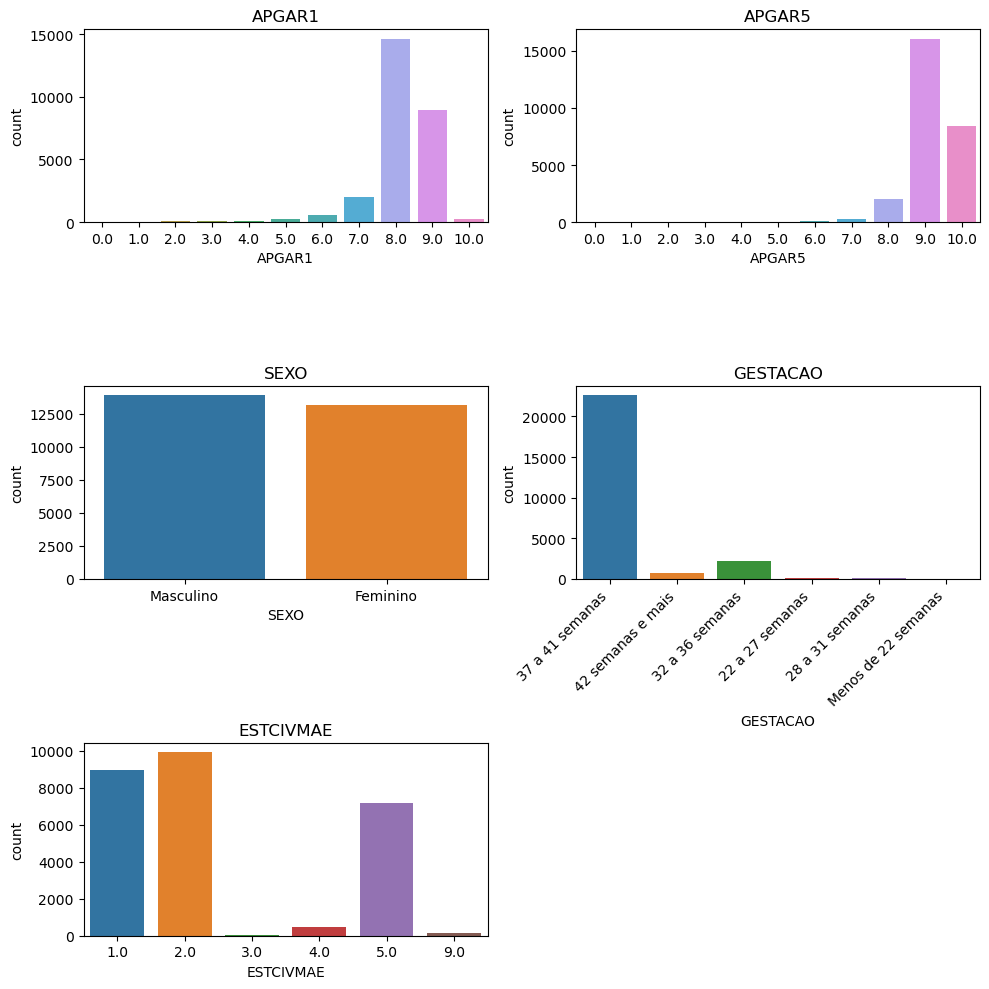

In [59]:
# Configuração dos gráficos
plt.figure(figsize=(10, 10))


# Plotar gráfico para a variável APGAR1
plt.subplot(3, 2, 1)
sns.countplot(x='APGAR1', data=df)
plt.title('APGAR1')

# Plotar gráfico para a variável APGAR5
plt.subplot(3, 2, 2)
sns.countplot(x='APGAR5', data=df)
plt.title('APGAR5')

# Plotar gráfico para a variável SEXO
plt.subplot(3, 2, 3)
sns.countplot(x='SEXO', data=df)
plt.title('SEXO')

# Plotar gráfico para a variável GESTACAO
plt.subplot(3, 2, 4)
gestacao_plot =sns.countplot(x='GESTACAO', data=df)
gestacao_plot.set_xticklabels(gestacao_plot.get_xticklabels(), rotation=45, ha='right')
plt.title('GESTACAO')


# Plotar gráfico para a variável ESTCIVMAE
plt.subplot(3, 2, 5)
sns.countplot(x='ESTCIVMAE', data=df)
plt.title('ESTCIVMAE')

# Exibir os gráficos

plt.tight_layout()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

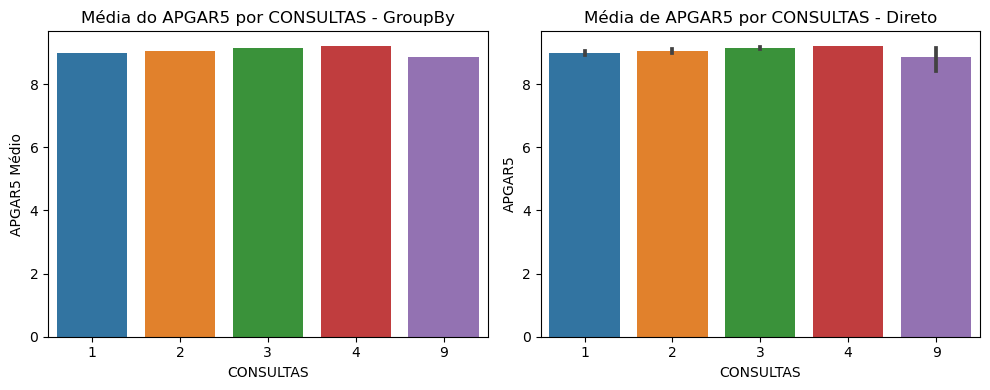

In [58]:
#Fazendo de duas maneiras

#1) Usando groupby

# Calcular a média do APGAR5 por CONSULTAS
media_apgar5_consultas = df.groupby('CONSULTAS')['APGAR5'].mean()

# Configurar a grade de subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plotar o gráfico de barras
sns.barplot(ax=axes[0],x=media_apgar5_consultas.index, y=media_apgar5_consultas)
axes[0].set_xlabel('CONSULTAS')
axes[0].set_ylabel('APGAR5 Médio')
axes[0].set_title('Média do APGAR5 por CONSULTAS - GroupBy')


#2) Direto com barplot
# Gráfico de barras mostrando a média de APGAR5 por CONSULTAS
sns.barplot(ax=axes[1], x='CONSULTAS', y='APGAR5', data=df)
axes[1].set_title('Média de APGAR5 por CONSULTAS - Direto')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()



####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

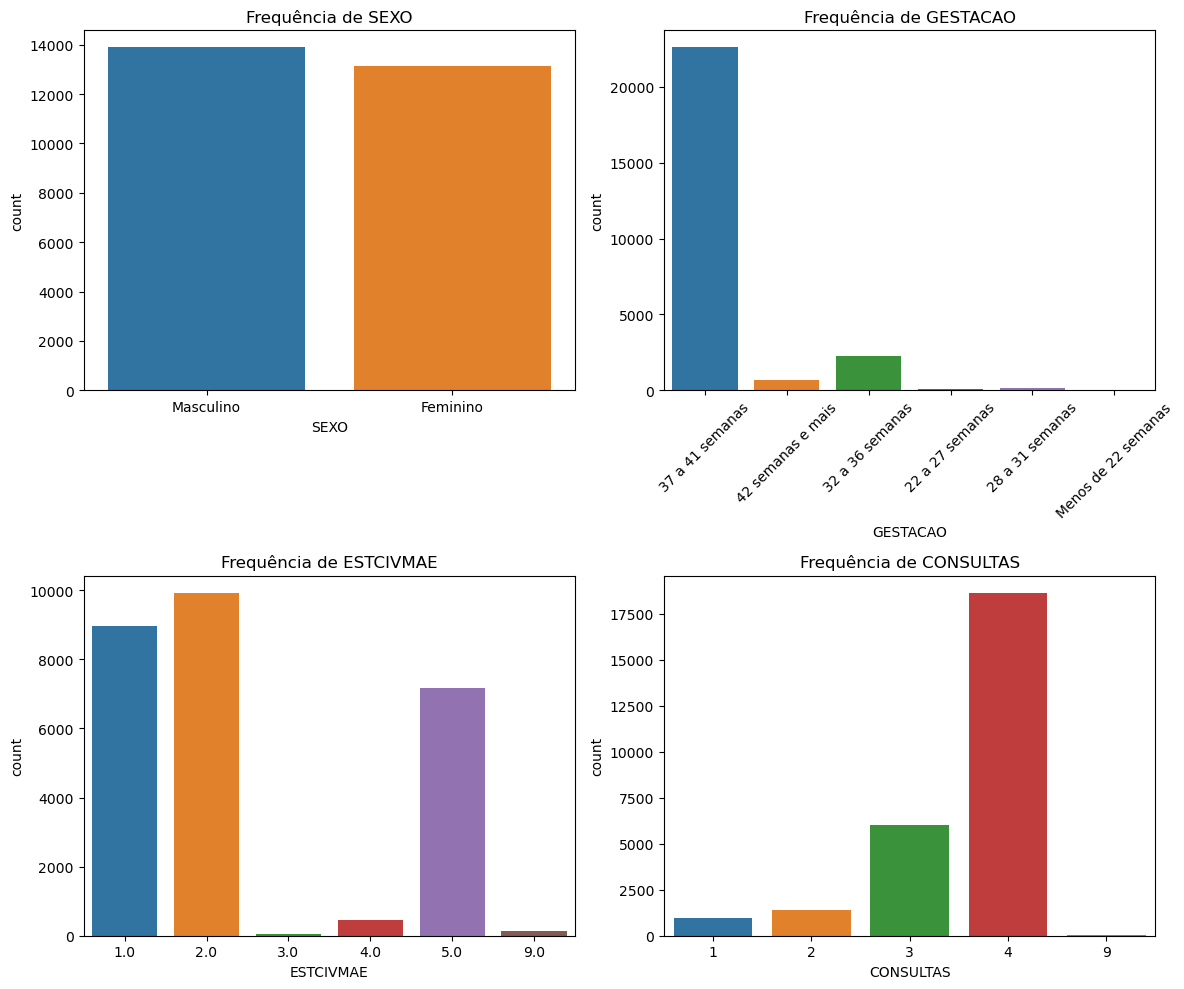

In [43]:
# Configurar a grade de subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico de frequência para SEXO
sns.countplot(ax=axes[0, 0], x='SEXO', data=df)
axes[0, 0].set_title('Frequência de SEXO')

# Gráfico de frequência para GESTACAO
sns.countplot(ax=axes[0, 1], x='GESTACAO', data=df)
axes[0, 1].set_title('Frequência de GESTACAO')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)  # Girar legendas do eixo x

# Gráfico de frequência para ESTCIVMAE
sns.countplot(ax=axes[1, 0], x='ESTCIVMAE', data=df)
axes[1, 0].set_title('Frequência de ESTCIVMAE')

# Gráfico de frequência para CONSULTAS
sns.countplot(ax=axes[1, 1], x='CONSULTAS', data=df)
axes[1, 1].set_title('Frequência de CONSULTAS')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()
